## The House Price Prediction Problem

Problem statement:

A dataset that records the house prices of 9,761 houses in King County, Washington, US is given. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc. 

Objective: 
Following tasks must be performed:  EDA,  Initial model fitting step ,Feature engineering ,Model fitting after feauture engineering.Experiment and check if a decision tree model can be used to fit the data mode accurately and perform Model testing.

In [144]:
#Importing all the required libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [145]:
# Reading the dataset:
house=df= pd.read_csv("wk3_kc_house_train_data.csv")
#number of rows and columns
house.shape

(9761, 21)

### 2. Exploratory data analysis:


In [4]:
#checking if the data has missing values or not.

house.info()   
#no missing values present
#no categorical values data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [5]:
# Analysing the CVDOT of the dataset

#removing scientific notation from the table
pd.set_option("display.float_format", lambda x: "%.5f" % x)

house.describe()      #describing the dataset statistically

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000,9761.00000
mean,4605288287.66919,542734.95164,3.37588,2.11718,2086.73415,15215.26063,1.48607,0.00840,0.24803,3.41553,7.66151,1793.29116,293.44299,1970.79951,86.06659,98077.79019,47.56005,-122.21432,1992.35970,12824.78517
std,2876044376.02698,379527.63854,0.96070,0.77397,927.19430,41266.73460,0.53232,0.09127,0.78788,0.65055,1.18268,835.76382,442.61272,29.24001,405.41737,53.20359,0.14024,0.13989,687.32225,26518.33740
min,1200019.00000,80000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51400,620.00000,660.00000
25%,2126049290.00000,320000.00000,3.00000,1.75000,1420.00000,5100.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.46780,-122.32700,1490.00000,5160.00000
50%,3905040800.00000,450000.00000,3.00000,2.25000,1910.00000,7642.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1570.00000,0.00000,1975.00000,0.00000,98065.00000,47.57220,-122.22900,1840.00000,7660.00000
75%,7338402850.00000,649000.00000,4.00000,2.50000,2570.00000,10660.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2230.00000,570.00000,1996.00000,0.00000,98117.00000,47.68040,-122.12600,2370.00000,10113.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,12050.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,8860.00000,3480.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31900,5790.00000,560617.00000


In [147]:
# Removing the columns which are ignored: ("id","sqft_living15","sqft_lot15")
house.drop(["id","sqft_living15","sqft_lot15"], axis='columns', inplace=True)

In [7]:
house.head()  # Veiwing the dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300
1,20140512T000000,1225000.00000,4,4.50000,5420,101930,1.00000,0,0,3,11,3890,1530,2001,0,98053,47.65610,-122.00500
2,20140527T000000,468000.00000,2,1.00000,1160,6000,1.00000,0,0,4,7,860,300,1942,0,98115,47.69000,-122.29200
3,20140528T000000,310000.00000,3,1.00000,1430,19901,1.50000,0,0,4,7,1430,0,1927,0,98028,47.75580,-122.22900
4,20141007T000000,400000.00000,3,1.75000,1370,9680,1.00000,0,0,4,7,1370,0,1977,0,98074,47.61270,-122.04500


#### Data manipulation :

In [146]:
#one value in the variable-"bedroom" had a outlier of 33
house=df= house[house.bedrooms != 33] #removing the outlier

#### Univariate analysis 

boxplot of sqft_living


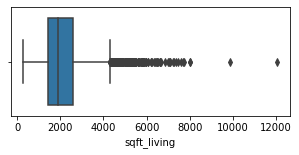

boxplot of sqft_above


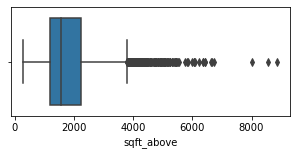

boxplot of sqft_basement


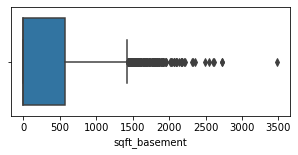

boxplot of bedrooms


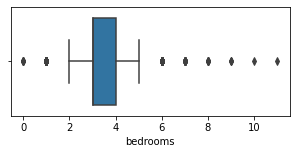

boxplot of bathrooms


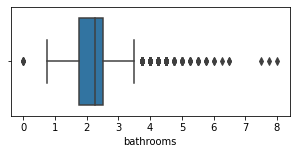

In [9]:
#Plotting the barplot to understand the outliers in the features:
df_boxplot = house[['sqft_living', 'sqft_above', 'sqft_basement','bedrooms','bathrooms']]  #Choosing the variables for the analysis
for i in df_boxplot.columns:     #using for loop for different variables
    plt.figure(figsize=(5,2))    #to plot the figure
    print("boxplot of %s" %(i))  #tagging the title
    sns.boxplot(x=i, data=house) #Plotting the box plot
    plt.show()

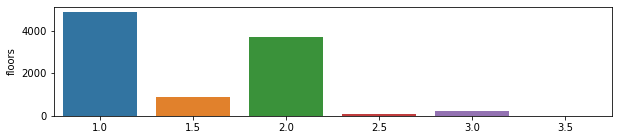

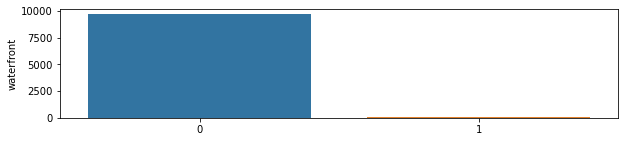

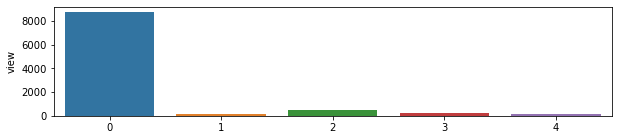

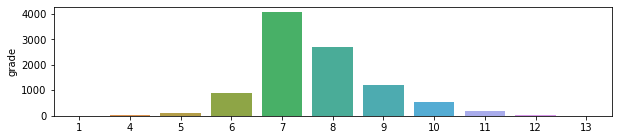

In [40]:
#Understanding the distribution of the no. of houses in the following categories: ['floors', 'waterfront', 'view', 'grade',"age"]
df_barplot = house[['floors', 'waterfront', 'view', 'grade']]  #Choosing the variables for the analysis
for i in df_barplot.columns:                  #using for loop for different variables
    plt.figure(figsize=(10,2))                #to plot the figure
    cat_num = house[i].value_counts()        
    sns.barplot(x=cat_num.index, y=cat_num)   #Plotting the bar plot
    plt.show()


C:\Users\Rohit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

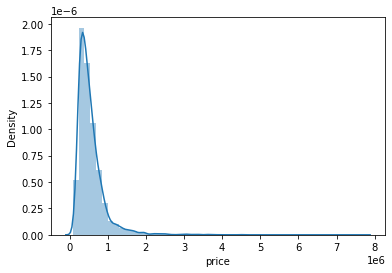

In [16]:
# Distribution of the price in the dataset:
sns.distplot(house['price'])

#### Bi-variate analysis

In [21]:
df= pd.read_csv("wk3_kc_house_train_data.csv")

Text(0, 0.5, 'price')

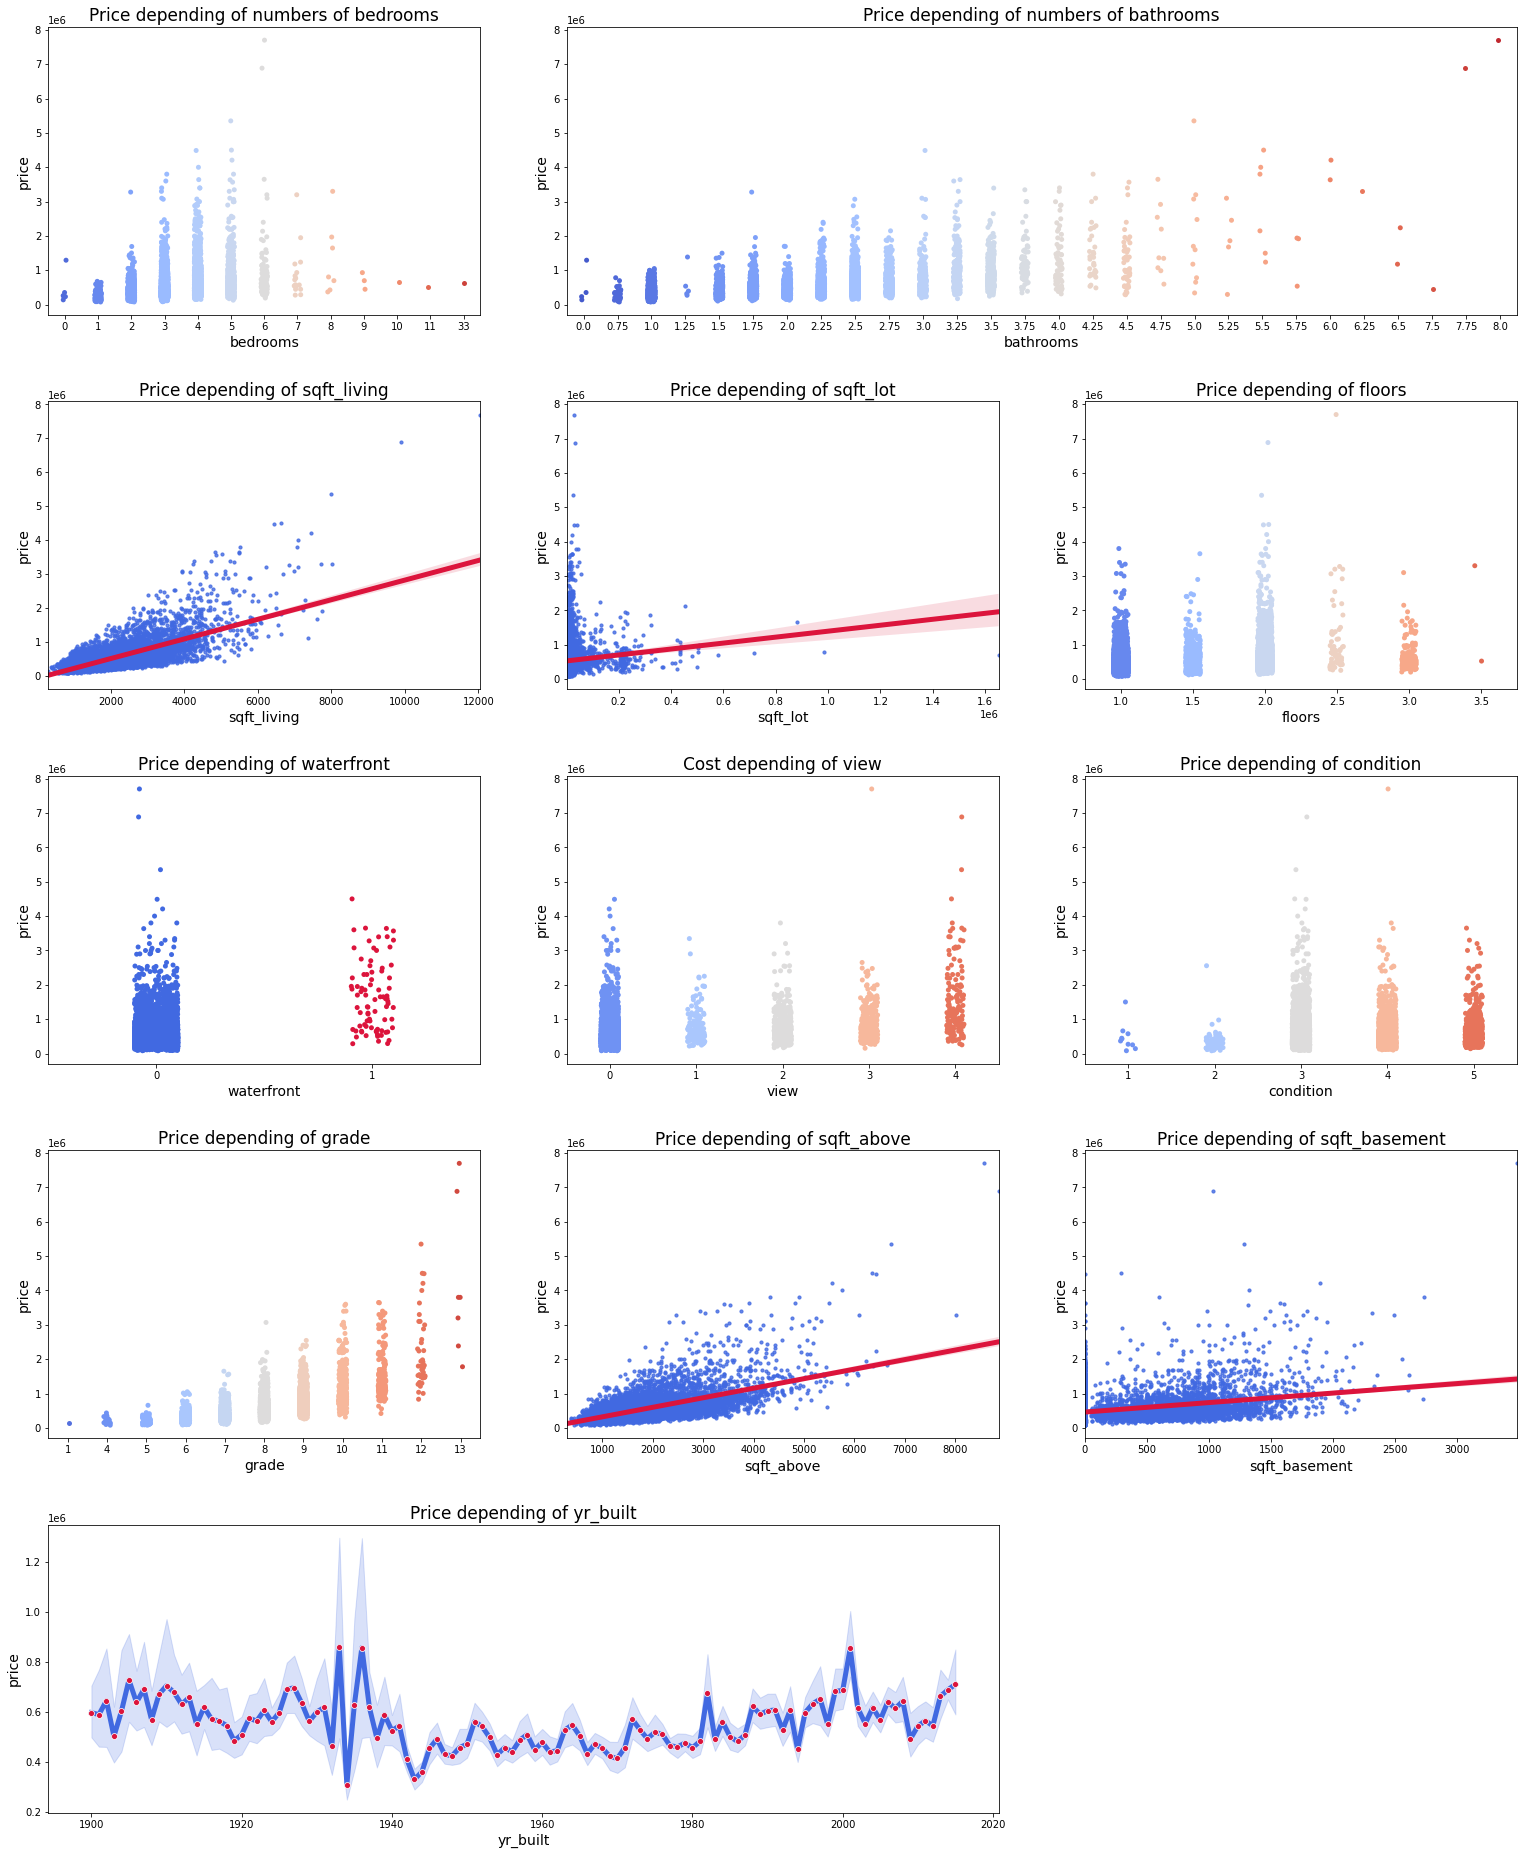

In [22]:
#Understanding the distribution of the price with respect to different variables:
#initiating the axes for the plotting of the charts
figure = plt.figure()
axes1 = figure.add_axes([0, 0, 1, 1]) 
axes2 = figure.add_axes([1.2, 0, 2.2, 1]) 
axes3 = figure.add_axes([0, -1.3, 1, 1]) 
axes4 = figure.add_axes([1.2, -1.3, 1, 1]) 
axes5 = figure.add_axes([2.4, -1.3, 1, 1]) 
axes6 = figure.add_axes([0, -2.6, 1, 1]) 
axes7 = figure.add_axes([1.2, -2.6, 1, 1]) 
axes8 = figure.add_axes([2.4, -2.6, 1, 1]) 
axes9 = figure.add_axes([0, -3.9, 1, 1]) 
axes10 = figure.add_axes([1.2, -3.9, 1, 1]) 
axes11 = figure.add_axes([2.4, -3.9, 1, 1])
axes12 = figure.add_axes([0, -5.2, 2.2, 1])  
#Plot to determine the Price depending of numbers of bedrooms
sns.stripplot(x='bedrooms', y='price', data=df, palette='coolwarm', ax=axes1)  #assigning the x and y titles to the plot
axes1.set_title('Price depending of numbers of bedrooms', fontsize=17)         #Titile for the plot
axes1.set_xlabel('bedrooms', fontsize=14)                                      #Axis name for x axis
axes1.set_ylabel('price', fontsize=14)                                         #Axis name for y axis
#Plot to determine the Price depending of numbers of bathrooms
sns.stripplot(x='bathrooms', y='price', data=df, palette='coolwarm', ax=axes2)
axes2.set_title('Price depending of numbers of bathrooms', fontsize=17)
axes2.set_xlabel('bathrooms', fontsize=14)
axes2.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of sqft_living
sns.regplot(x='sqft_living', y='price', data=df, color='royalblue', ax=axes3, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes3.set_title('Price depending of sqft_living', fontsize=17)
axes3.set_xlabel('sqft_living', fontsize=14)
axes3.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of sqft_lot
sns.regplot(x='sqft_lot', y='price', data=df, color='royalblue', ax=axes4, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes4.set_title('Price depending of sqft_lot', fontsize=17)
axes4.set_xlabel('sqft_lot', fontsize=14)
axes4.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of floors
sns.stripplot(x='floors', y='price', data=df, palette='coolwarm', ax=axes5)
axes5.set_title('Price depending of floors', fontsize=17)
axes5.set_xlabel('floors', fontsize=14)
axes5.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of waterfront
sns.stripplot(x='waterfront', y='price', data=df, palette=['royalblue', 'crimson'], ax=axes6)
axes6.set_title('Price depending of waterfront', fontsize=17)
axes6.set_xlabel('waterfront', fontsize=14)
axes6.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of veiw
sns.stripplot(x='view', y='price', data=df, palette='coolwarm', ax=axes7)
axes7.set_title('Cost depending of view', fontsize=17)
axes7.set_xlabel('view', fontsize=14)
axes7.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending on condition
sns.stripplot(x='condition', y='price', data=df, palette='coolwarm', ax=axes8)
axes8.set_title('Price depending of condition', fontsize=17)
axes8.set_xlabel('condition', fontsize=14)
axes8.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of grade
sns.stripplot(x='grade', y='price', data=df, palette='coolwarm', ax=axes9)
axes9.set_title('Price depending of grade', fontsize=17)
axes9.set_xlabel('grade', fontsize=14)
axes9.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of sqft_above
sns.regplot(x='sqft_above', y='price', data=df, color='royalblue', ax=axes10, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes10.set_title('Price depending of sqft_above', fontsize=17)
axes10.set_xlabel('sqft_above', fontsize=14)
axes10.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of sqft_basement       
sns.regplot(x='sqft_basement', y='price', data=df, color='royalblue', ax=axes11, scatter_kws={'s' : 10}, line_kws={'color': 'crimson', 'lw': 5})
axes11.set_title('Price depending of sqft_basement', fontsize=17)
axes11.set_xlabel('sqft_basement', fontsize=14)
axes11.set_ylabel('price', fontsize=14)
#Plot to determine the Price depending of yr_built
sns.lineplot(x='yr_built', y='price', data=df, color='royalblue', ax=axes12, lw=5, marker='o', markerfacecolor='crimson')
axes12.set_title('Price depending of yr_built', fontsize=17)
axes12.set_xlabel('yr_built', fontsize=14)
axes12.set_ylabel('price', fontsize=14)

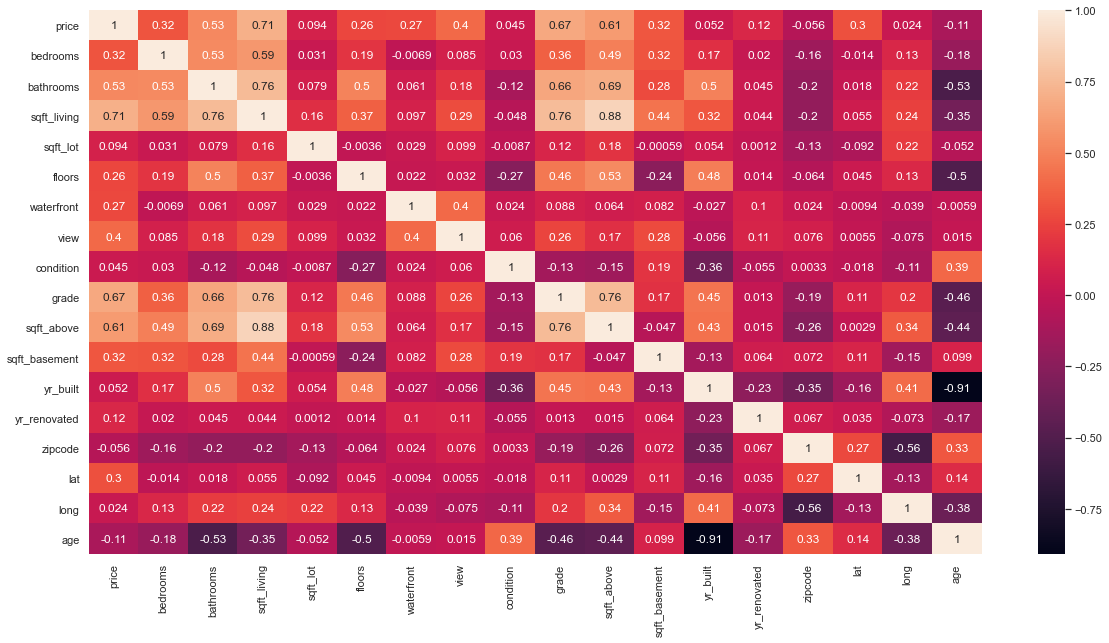

In [25]:
#Using the heatmap from seaborn library to understand the correlation amoung the variables:
sns.set()
corr = house.corr()
plt.figure(figsize=(20,10))   #initialising the figure size
sns.heatmap(corr,annot=True)  #plotting the heat map to determine correlation
plt.show()

From the above analysis we have decided the choose the following variables for initial model fitting setup which will be altered later during the process of feature engineering.
Following are the vaiables:('bedrooms','sqft_living', 'floors','lat', 'grade','waterfront','view')

### 3. Initial model fitting setup 


#### Linear regression Model - 1

Set of Predictors : ['bedrooms','sqft_living', 'floors','lat','long', 'grade','waterfront','view']

In [63]:
#Assigning the set of target variables and predictors : 
X = house[['bedrooms','sqft_living', 'floors','lat',"long", 'grade','waterfront','view']]    #Target Variables
Y = house['price']                                                        #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [64]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value


#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 136450.17482937063
The R-square is : 0.6717742305049887


#### 10-fold cross-validation of the chosen set of predictors :

In [67]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation

print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))

The maximum value obtained in 10-fold cross-validation is :  0.658949853327712


#### Linear regression Model - 2

Set of Predictors : ["bedrooms","bathrooms","sqft_living","view","grade","sqft_above","sqft_basement"]

In [68]:
#Assigning the set of target variables and predictors : 
X = house[["bedrooms","bathrooms","sqft_living","view","grade","sqft_above","sqft_basement"]]    #Target Variables
Y = house['price']                                                        #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [69]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value


#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 159177.04925786884
The R-square is : 0.5834042781482633


#### 10-fold cross-validation of the chosen set of predictors :

In [71]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation
print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))

The average value obtained in 10-fold cross-validation is :  0.574449130082978


#### Linear regression Model - 3

Set of Predictors : ['bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade','sqft_above', 'sqft_basement','lat',]

In [72]:
#Assigning the set of target variables and predictors : 
X = house[['bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade','sqft_above', 'sqft_basement','lat','long']]    #Target Variables
Y = house['price']                                                        #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [73]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value


#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 135492.1476568864
The R-square is : 0.6783158161950773


#### 10-fold cross-validation of the chosen set of predictors :

In [75]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation

print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))

The average value obtained in 10-fold cross-validation is :  0.667066985359566


### 4.  Feature engineering

#### Feature genertion and transformation:

In [49]:
#Transforming the date feature to object to datetime 

#Altering the date column from object to date datatype:
#creating a new variable df to assign date coloumn
df = house[["date"]]   
df['date'] = df['date'].replace('T000000', '', regex=True)  #removing un-necessary characters
df['date'] = pd.to_datetime(df['date'])                     #converting into datetime format
df['year'] = df['date'].apply(lambda x: x.year)             #filtering the date to year
house[["date"]] = df['date']                                #changing the date to new format

<ipython-input-49-71dffeb0d916>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].replace('T000000', '', regex=True)  #removing un-necessary characters
<ipython-input-49-71dffeb0d916>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])                     #converting into datetime format
<ipython-input-49-71dffeb0d916>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [50]:
# Creating a new feauture:
#Age of the house :

house['age'] = 2020-house['yr_built']          #Calculating the age of the house since construction
house['diff'] =(2020-house['yr_renovated'])    #Calculating the age of the house since renovation
house['diff'] =house['diff'].replace([2020],0) #replacing the values of non renovated to 0
house.loc[house['diff'] != 0, 'age'] = house['diff']  #Changing the value of the age if the house is renovated by tracking zero

house = house.drop(['diff'],axis=1)    #Dropping the variable diff which is used for calculation

In [76]:
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,age
0,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,55
1,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,19
2,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,78
3,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,93
4,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,2015-01-26,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,6
9757,2014-10-14,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,6
9758,2015-03-26,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,11
9759,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,11


<AxesSubplot:xlabel='age', ylabel='Count'>

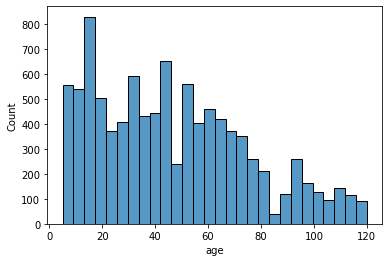

In [23]:
#Plotting the No.of house w.r.t age of the house:
sns.histplot(data= house['age'], x=house['age'])

### Linear regression Model - by adding age feauture to the Linear model -1:

Set of Predictors used : ['bedrooms','sqft_living', 'floors','lat', 'grade','waterfront','view','age']

In [77]:
#Assigning the set of target variables and predictors : 
X = house[['bedrooms','sqft_living', 'floors','lat','long', 'grade','waterfront','view','age']]    #Target Variables
Y = house['price']                                                        #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [78]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value

#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 131713.70321659674
The R-square is : 0.6868270290821858


#### 10-fold cross-validation of the chosen set of predictors :

In [81]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation

print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.6748045162975694
The maximum value obtained in 10-fold cross-validation is :  0.718469469940836


### Feature transformation

As the price data is right skewed while distributed, we are taking the log of the prices and fitting it in the regression model

Set of Predictors : ['bedrooms','sqft_living', 'floors','lat','long', 'grade','waterfront','view','age']

In [82]:
#Assigning the set of target variables and predictors : 
X = house[['bedrooms','sqft_living', 'floors','lat','long', 'grade','waterfront','view','age']]    #Target Variables
Y = np.log(house['price'])                                                        #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state = 33)

In [83]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 116664.20849846865
The R-square is : 0.733670631225326


#### 10-fold cross-validation of the chosen set of predictors :

In [84]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of 

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)

print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.7475542275465196
The maximum value obtained in 10-fold cross-validation is :  0.7763792286652261


#### Creating the dummy variables for the one-hot encoding :

Considering the zipcode as a categorical variable ,  we do one-hot encoding on the zipcode feature to transform data to binary and perform regression:

In [59]:
house['zipcode']= house['zipcode'].map(str)  #Converting the zipcode data from numerical to binary

In [85]:
# create Taret and the predictor variable
feature_cols =['bedrooms','sqft_living', 'floors','lat','long', 'grade','waterfront','view','age','zipcode']  #Adding the required features
x = house[feature_cols] # predictor set of features
X = pd.get_dummies(x)   # Creating the binary using get_dummies

Y = np.log(house['price'])                                     #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 33)

In [86]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 80492.01614103734
The R-square is : 0.8559684742835678


#### 10-fold cross-validation of the chosen set of predictors :

In [87]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation


print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.8659471962187206
The maximum value obtained in 10-fold cross-validation is :  0.8812245563794224


### 5. Using forward selection to select an appropriate model

In [140]:
#Reading the dataset
df= pd.read_csv("wk3_kc_house_train_data.csv")
#Splitting the dataset:
X=df.drop(['price','date','id'],axis='columns')
Y=df['price']

#Splitting the data set into test and train for the train and validation purpose:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 33)

In [141]:
#Forward selection:
sfs=SFS(LinearRegression(fit_intercept=True,
    normalize=False,n_jobs=-1),k_features=(1,10),forward=True,floating=False,verbose=2,cv=4,n_jobs=-1).fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-05-24 21:04:09] Features: 1/10 -- score: 0.498465482405281[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2021-05-24 21:04:09] Features: 2/10 -- score: 0.5652726021534225[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished

[2021-05-24 21:04:09] Features: 3/10 -- score: 0.6058447709259797[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 

In [142]:
#Printing the accuracy and the features which is obtained by forward selection:
print("Accuracy : ",sfs.k_score_)
print("Feautures selected : ",sfs.k_feature_names_)

Accuracy :  0.6902169495602595
Feautures selected :  ('bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'yr_built', 'zipcode', 'lat', 'long')


### 6. Decision tree

In [148]:
#seperating the Predictor from the other features:
X = house.drop(["price"], axis='columns')
y=house['price']

### Working on 3 set of target features used in linear regression:

Decision Tree Model - 1

Set of Predictors : ['bedrooms','sqft_living', 'floors','lat', 'grade','waterfront','view']

In [149]:
#Assigning the feautures to the variable X
X = house[['bedrooms','sqft_living', 'floors','lat','long','grade','waterfront','view']]

In [152]:
from math import sqrt
#Splitting the dataset in the train and test set:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [153]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor(max_depth = 7,min_samples_leaf =10) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values

#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Ca

MAE is: 100909.77728642887
RMSE is: 174614.3234227898
R-square is: 0.7942583788433503


Decision Tree Model - 2

Set of Predictors : ["bedrooms","bathrooms","sqft_living","view","grade","sqft_above","sqft_basement"]

In [154]:
#Assigning the feautures to the variable X
X = house[["bedrooms","bathrooms","sqft_living","view","grade","sqft_above","sqft_basement"]]

In [155]:
#Splitting the dataset in the train and test set:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [156]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor(max_depth = 7,min_samples_leaf =10) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values

#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 153192.64802929648
RMSE is: 239888.60858867608
R-square is: 0.6116872260212338


Decision Tree Model - 3

Set of Predictors : ['bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade','sqft_above', 'sqft_basement','lat',]

In [157]:
#Assigning the feautures to the variable X
X = house[['bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade','sqft_above', 'sqft_basement','lat',]]

In [158]:
#Splitting the dataset in the train and test set:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [159]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor(max_depth = 8,min_samples_leaf =16) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values

#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 117301.39285958878
RMSE is: 220639.5678399671
R-square is: 0.6715046525857349


### Decision tree after the feature transformation:

In [160]:
#Transforming the date feature to object to datetime 

#Altering the date column from object to date datatype:
#creating a new variable df to assign date coloumn
df = house[["date"]]   
df['date'] = df['date'].replace('T000000', '', regex=True)  #removing un-necessary characters
df['date'] = pd.to_datetime(df['date'])                     #converting into datetime format
df['year'] = df['date'].apply(lambda x: x.year)             #filtering the date to year
house[["date"]] = df['date']                                #changing the date to new format

<ipython-input-160-71dffeb0d916>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].replace('T000000', '', regex=True)  #removing un-necessary characters
<ipython-input-160-71dffeb0d916>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])                     #converting into datetime format
<ipython-input-160-71dffeb0d916>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [161]:
# Creating a new feauture:
#Age of the house :

house['age'] = 2020-house['yr_built']          #Calculating the age of the house since construction
house['diff'] =(2020-house['yr_renovated'])    #Calculating the age of the house since renovation
house['diff'] =house['diff'].replace([2020],0) #replacing the values of non renovated to 0
house.loc[house['diff'] != 0, 'age'] = house['diff']  #Changing the value of the age if the house is renovated by tracking zero

house = house.drop(['diff'],axis=1)    #Dropping the variable diff which is used for calculation

Using the age along with the following set of predicors as the accuracy was better comparing to others : ['bedrooms','sqft_living', 'floors','lat', 'grade','waterfront','view'] +['age']

In [162]:
#Assigning the feautures to the variable X
X = house[["bedrooms","sqft_living","floors","sqft_above","sqft_basement","lat","long","age"]]

In [163]:
#Splitting the dataset in the train and test set:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [164]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor(max_depth = 8,min_samples_leaf =14) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values

#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 105899.11666983597
RMSE is: 190621.50547425452
R-square is: 0.7548080447829282


#### As the price data is right skewed while distributed, we are taking the log of the prices and fitting it in the regression model

In [165]:
#Assigning the feautures to the variable X
X = house[["bedrooms","sqft_living","floors","sqft_above","sqft_basement","lat","long","age"]]

In [166]:
y=np.log(house['price'])

In [167]:
#Splitting the dataset in the train and test set:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=33)

In [168]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor(max_depth = 8,min_samples_leaf =14) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)
#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 103167.15850119885
RMSE is: 196260.53545828492
R-square is: 0.7127019144863349


### Considering the zipcode as a categorical variable ,  we do one hot encoding and fit decision tree model:

In [169]:
house['zipcode']= house['zipcode'].map(str)  #Converting the zipcode data from numerical to binary

In [170]:
# create Taret and the predictor variable
feature_cols =['bedrooms','sqft_living', 'floors','lat','long', 'grade','waterfront','view','age','zipcode']  #Adding the required features
X = house[feature_cols] # predictor set of features
X = pd.get_dummies(X)   # Creating the binary using get_dummies

Y = np.log(house['price'])  #Target

In [171]:
#Splitting the dataset in the train and test set:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state = 7)

In [172]:
#Decision Tree 
tr_regressor = DecisionTreeRegressor(max_depth = 14,min_samples_leaf =40) #loading the decision tree alogorithm
tr_regressor.fit(X_train,y_train)    #Fitting the model
y_pred = tr_regressor.predict(X_test) #Predicting the y values
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)
#Printing the MAE,RMSE and R-square values :
print ('MAE is:', mean_absolute_error(y_test, y_pred  ))   #Calculating and printing the mean absolute error
print ('RMSE is:', sqrt(mean_squared_error(y_test,y_pred  )))  #Calculating and printing the root mean square error
print ('R-square is:', r2_score(y_test,y_pred))   #Calculating and printing the R-square value

MAE is: 101506.9028649118
RMSE is: 210172.1524385051
R-square is: 0.7021991209997


### 7. Model Testing on the Test Data

Choosing the best model and performing the linear regression on the test dataset.

In [134]:
# Reading the dataset:
house=df= pd.read_csv("wk3_kc_house_test_data.csv")

In [100]:
# Removing the columns which are ignored: ("id","sqft_living15","sqft_lot15")
house.drop(["id","date","sqft_living15","sqft_lot15"], axis='columns', inplace=True)

In [101]:
# Creating a new feauture:
#Age of the house :

house['age'] = 2020-house['yr_built']          #Calculating the age of the house since construction
house['diff'] =(2020-house['yr_renovated'])    #Calculating the age of the house since renovation
house['diff'] =house['diff'].replace([2020],0) #replacing the values of non renovated to 0
house.loc[house['diff'] != 0, 'age'] = house['diff']  #Changing the value of the age if the house is renovated by tracking zero

house = house.drop(['diff'],axis=1)    #Dropping the variable diff which is used for calculation

In [102]:
house['zipcode']= house['zipcode'].map(str)  #Converting the zipcode data from numerical to binary

In [103]:
# create Taret and the predictor variable
feature_cols =['bedrooms','sqft_living', 'floors','lat','long', 'grade','waterfront','view','age','zipcode']  #Adding the required features
x = house[feature_cols] # predictor set of features
X = pd.get_dummies(x)   # Creating the binary using get_dummies

Y = np.log(house['price'])                                     #Predictors
#Splitting the data set into test and train for the train and validation purpose:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 33)

In [105]:
# Standardizing the target variables :
std = StandardScaler()                    #Assigning the function
X_train_std = std.fit_transform(X_train)  #Standardizing the train set of data 
X_test_std = std.transform(X_test)        #Standardizing the test set of data 
lr = LinearRegression()            #Linear regression function assigned to lr
lr.fit(X_train_std,Y_train)        #fitting the model
Y_pred = lr.predict(X_test_std)    #predicted value
Y_pred = np.exp(Y_pred)
Y_test = np.exp(Y_test)
#Calculating the mean absolute error:  
print("The MAE is :" ,mean_absolute_error(Y_test,Y_pred) ) #Mean absolute error 
#Calculating the R_square value:
print("The R-square is :",r2_score(Y_test,Y_pred))    #R_square value

The MAE is : 77261.82510863016
The R-square is : 0.8805407005455881


#### 10-fold cross-validation of the chosen set of predictors :

In [106]:
# create a KFold object with 10 splits 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)       #Split of the dataset

scores = cross_val_score(lr, X_train, Y_train, scoring='r2', cv=folds)  #fitting the Cross validation


print("The average value obtained in 10-fold cross-validation is : ", np.mean(scores))
print("The maximum value obtained in 10-fold cross-validation is : ", max(scores))

The average value obtained in 10-fold cross-validation is :  0.855155998454587
The maximum value obtained in 10-fold cross-validation is :  0.8868350480737387


### The R-square obtained by LR on the test dataset is: 0.8805407005455881
### The average R-square value obtained by 10-fold cross-validation on the test dataset is :  0.855155998454587